# 1 - Exploration

## Imports

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
import warnings
warnings.filterwarnings("ignore")

## Predefined variables

In [126]:
DATA_DIR_PATH = "../data/heart-failure/"
CSV_PATH = "../data/heart-failure/heart.csv"
MEDIA_DIR_PATH = "../media/"

COLOR = "crimson"
PALETTE = "flare"

## EDA (Exploratory Data Analysis)

In [127]:
# Load the dataset
heart_data = pd.read_csv(CSV_PATH)

In [128]:
# Show the first 10 rows of the dataset
heart_data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [129]:
# Show the shape of the dataset
heart_data.shape

(918, 12)

In [130]:
# Show general information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [131]:
# Show the amount of null-values in each column
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [132]:
# Show the statistical summary of numerical columns
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [133]:
# Show the value counts for each categorical column
for column in heart_data.select_dtypes(include=['object']).columns:
    print(f"\033[1mValue counts for {column}:\033[0m")
    print(heart_data[column].value_counts())
    print("\n")

Value counts for Sex:
Sex
M    725
F    193
Name: count, dtype: int64


Value counts for ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


Value counts for RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


Value counts for ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


Value counts for ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64




In [134]:
# Show the number of unique values in each column
heart_data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Univariate Analysis

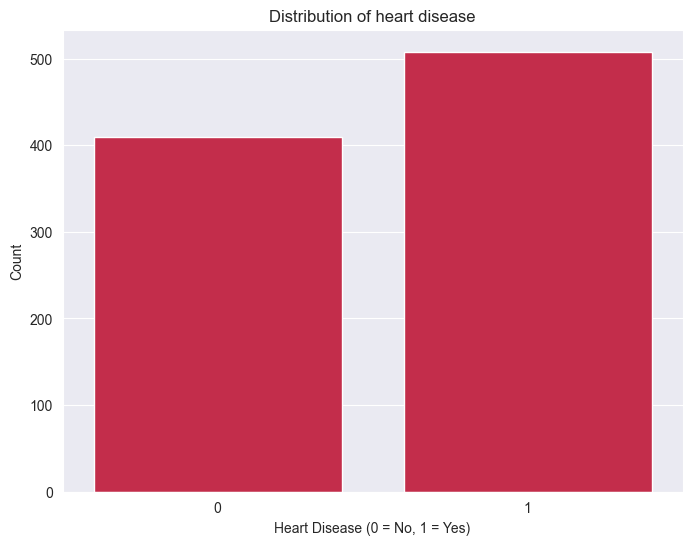

In [145]:
# Visualize the distribution of the target variable 'HeartDisease'
heart_disease_counts = heart_data['HeartDisease'].value_counts()

sns.set_style("darkgrid")

plt.figure(figsize=(8, 6))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, color=COLOR)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of heart disease')
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(8, 6))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, color=COLOR)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of heart disease')
plt.savefig(f"{MEDIA_DIR_PATH}01-heartDisease_distribution.png")
plt.close()

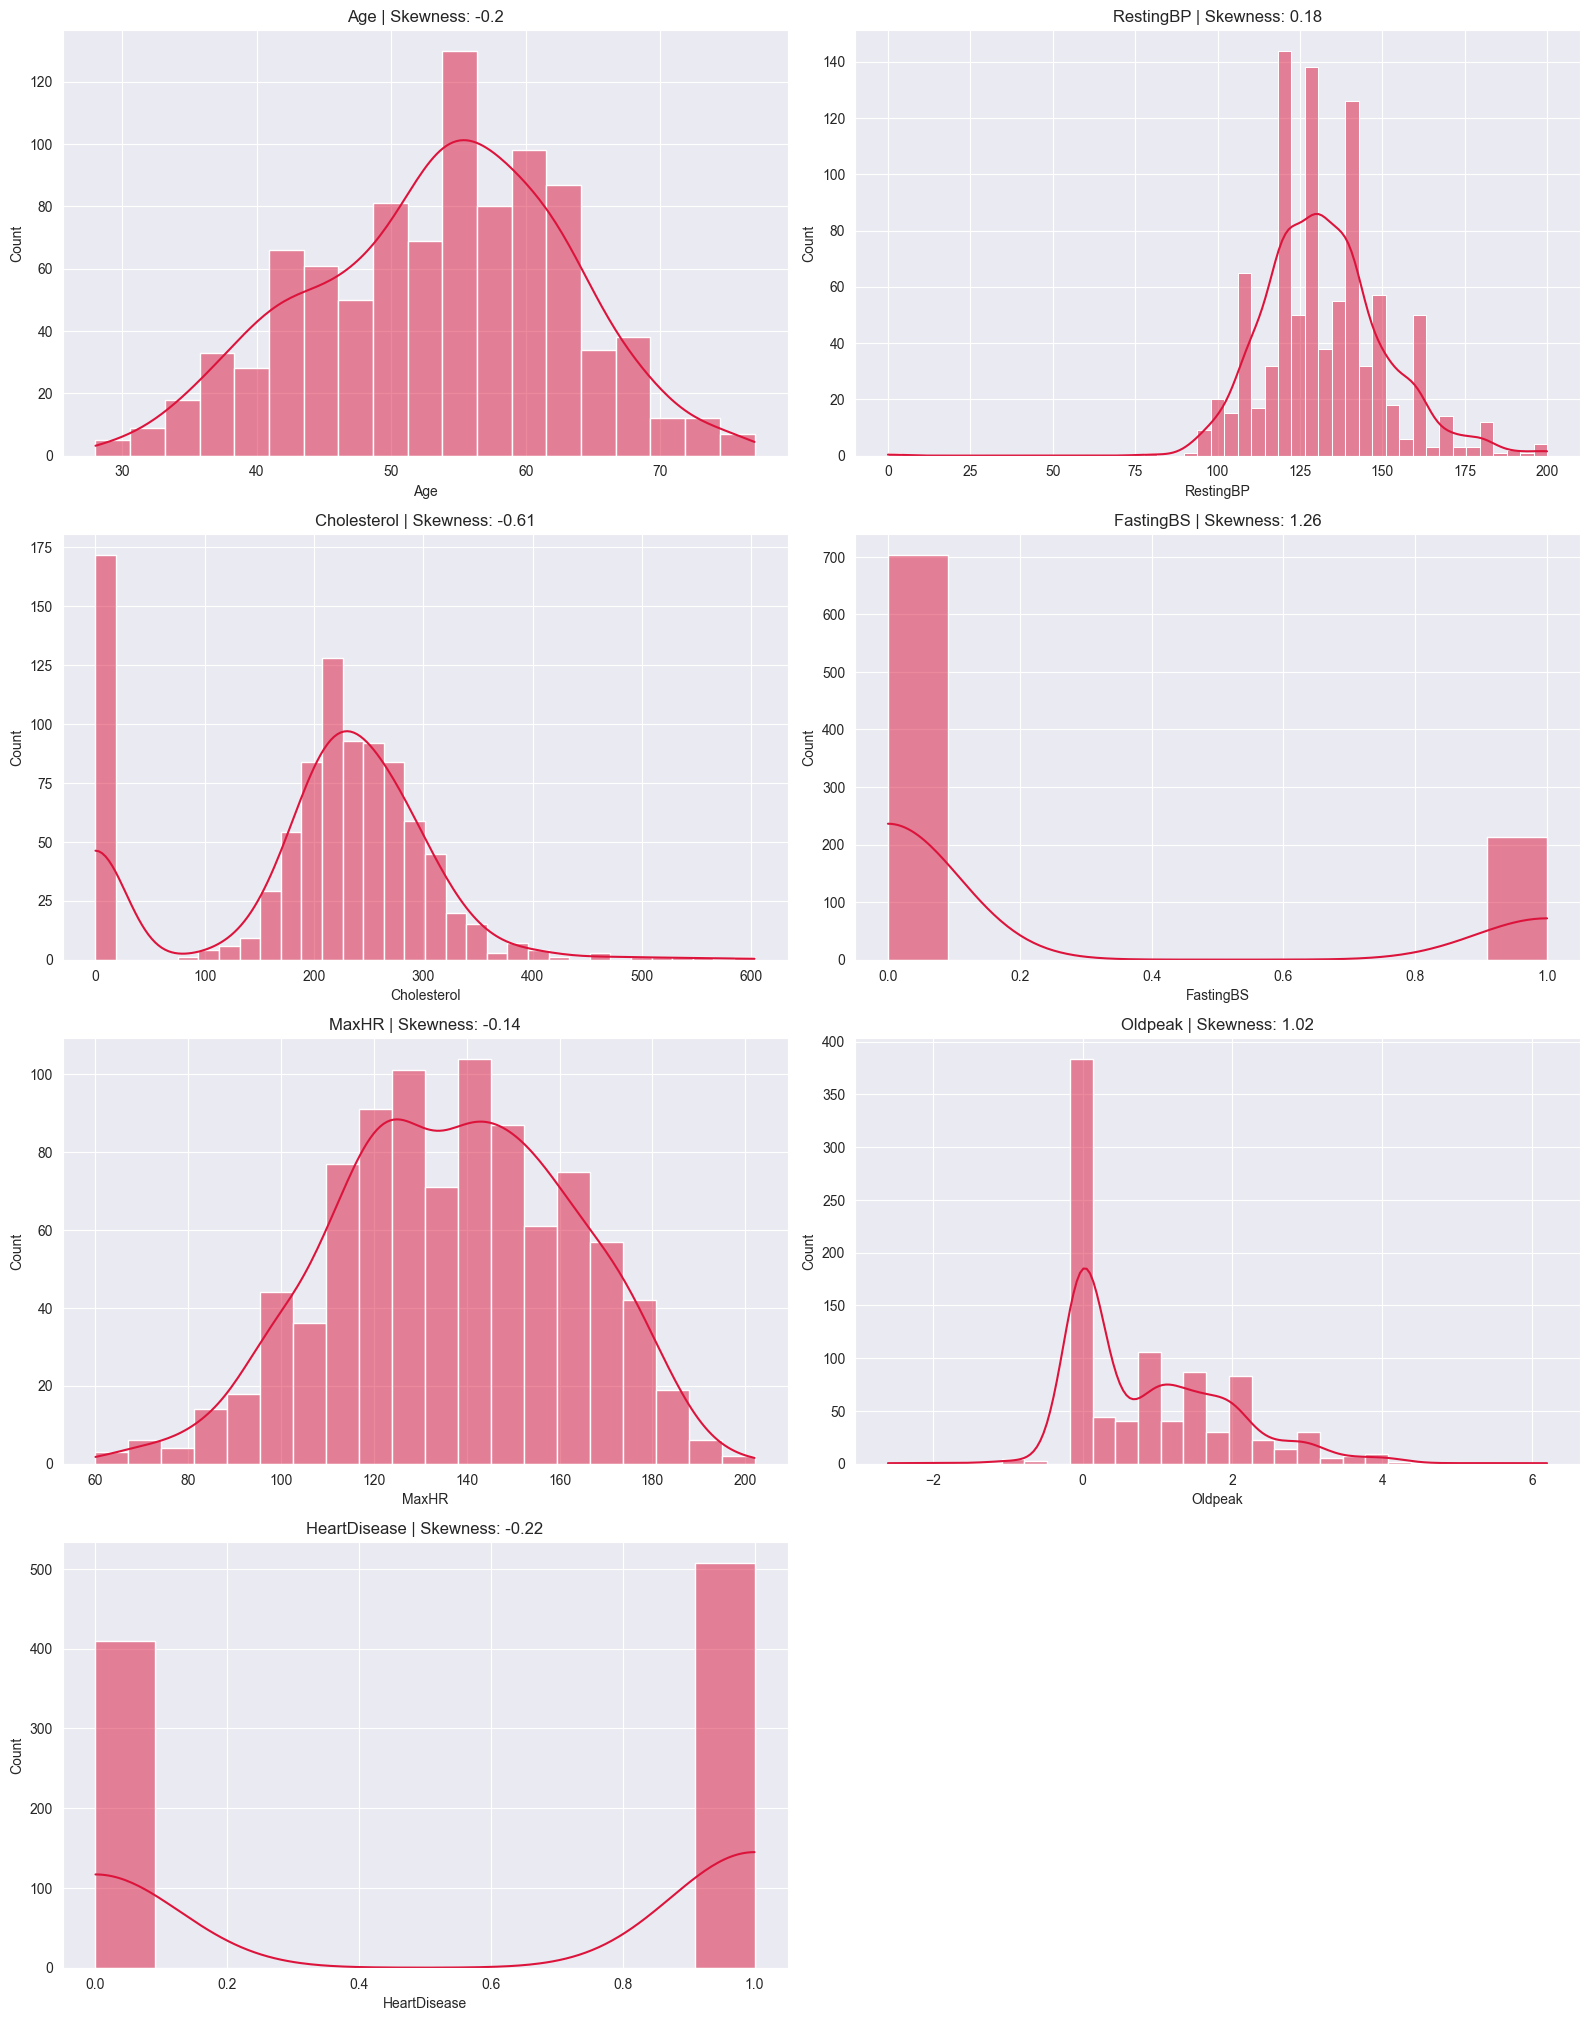

In [136]:
# Visualize a kernel density plot for all the numerical features
numerical_columns = heart_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

sns.set_style("darkgrid")

plt.figure(figsize=(16, len(numerical_columns) * 5))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(heart_data[feature], kde=True, color=COLOR)
    plt.title(f"{feature} | Skewness: {round(heart_data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(16, len(numerical_columns) * 5))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(heart_data[feature], kde=True, color=COLOR)
    plt.title(f"{feature} | Skewness: {round(heart_data[feature].skew(), 2)}")

plt.tight_layout()
plt.savefig(f"{MEDIA_DIR_PATH}01-kernel_density_plot.png")
plt.close()

### Bivariate Analysis

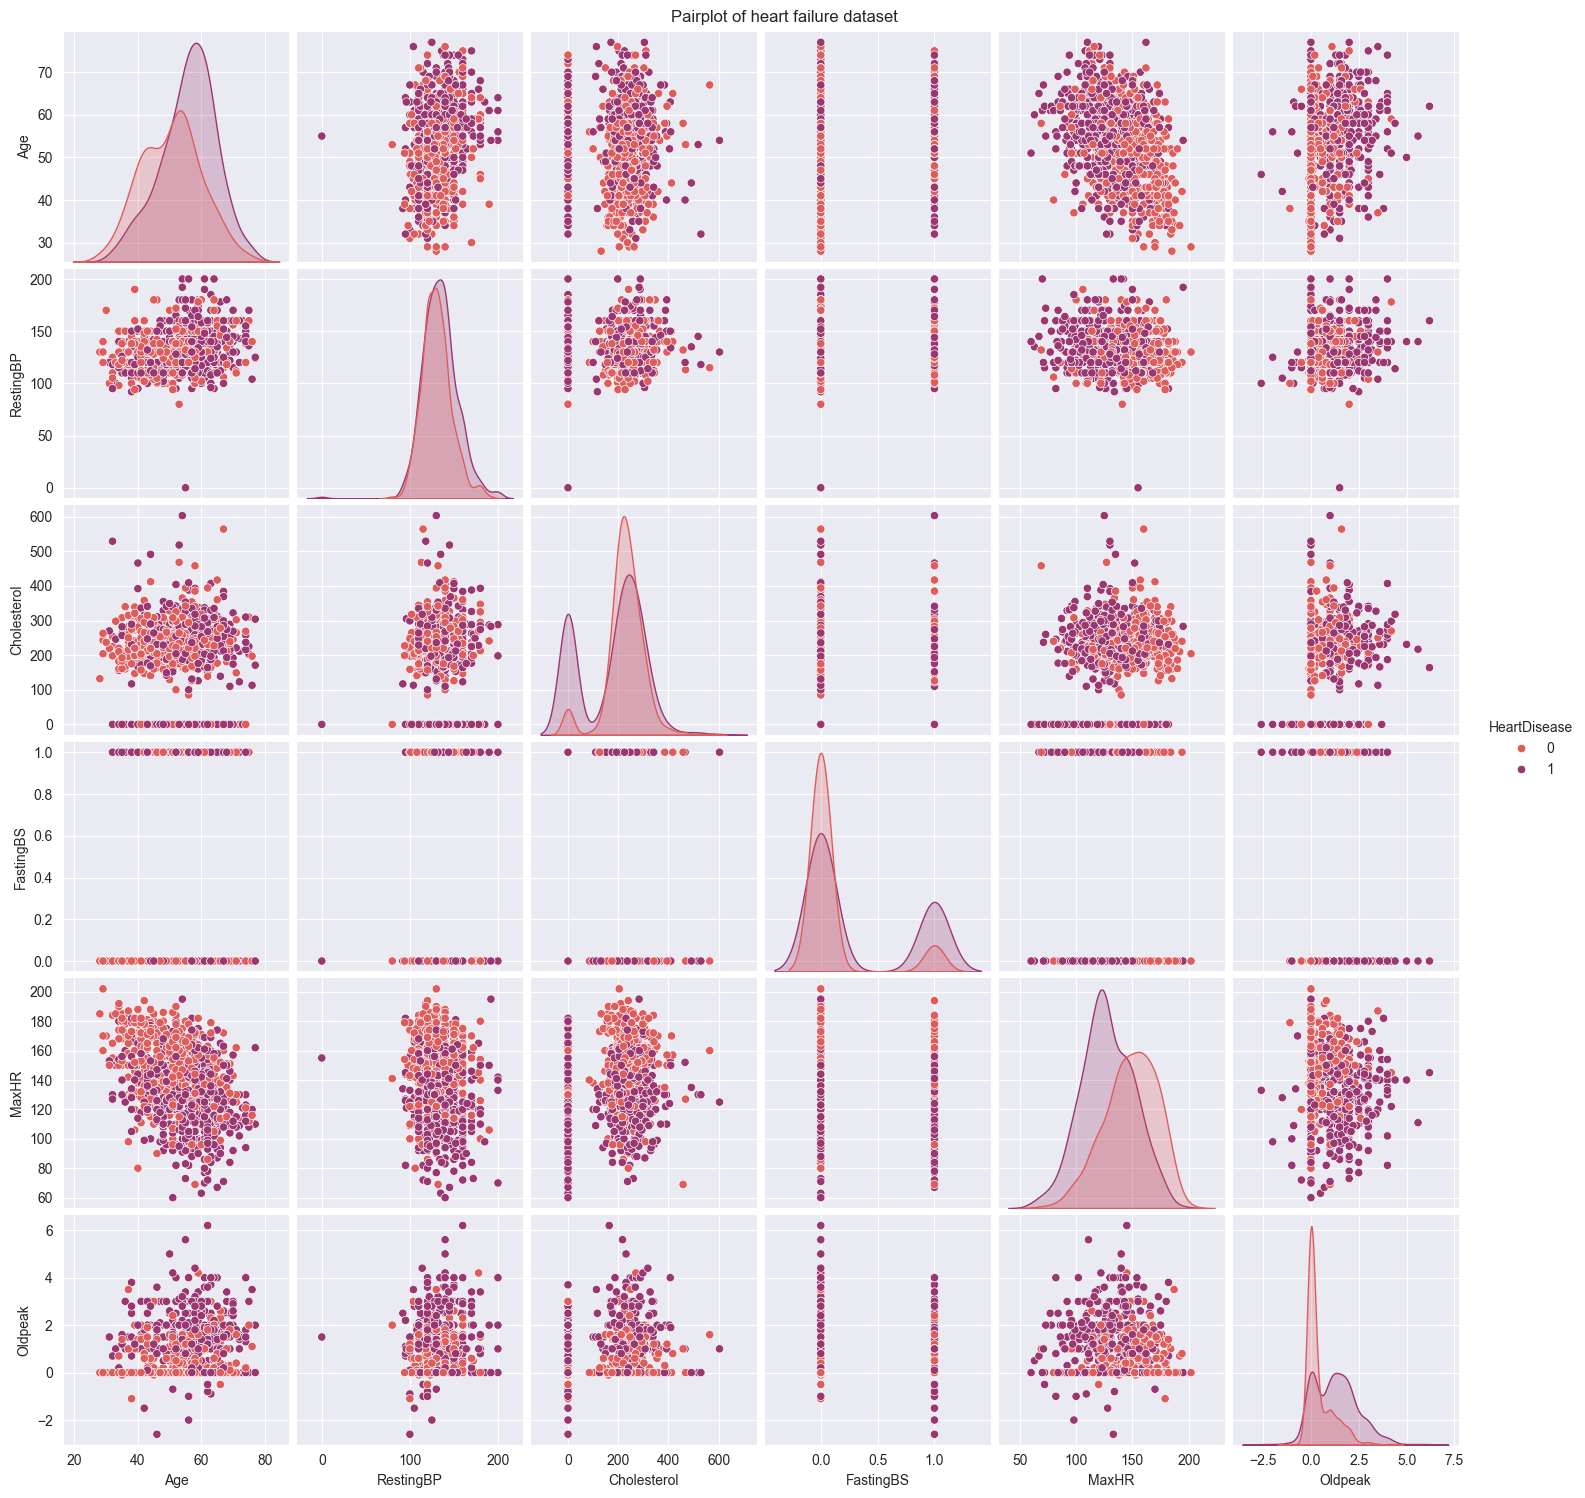

In [137]:
# Visualize a pairplot to see relationships between features
sns.pairplot(heart_data, hue='HeartDisease', palette=PALETTE)
plt.suptitle('Pairplot of heart failure dataset', y=1.0)
plt.show()

# Save this figure in MEDIA_DIR_PATH
sns.pairplot(heart_data, hue='HeartDisease', palette=PALETTE)
plt.savefig(f"{MEDIA_DIR_PATH}01-pairplot.png")
plt.close()

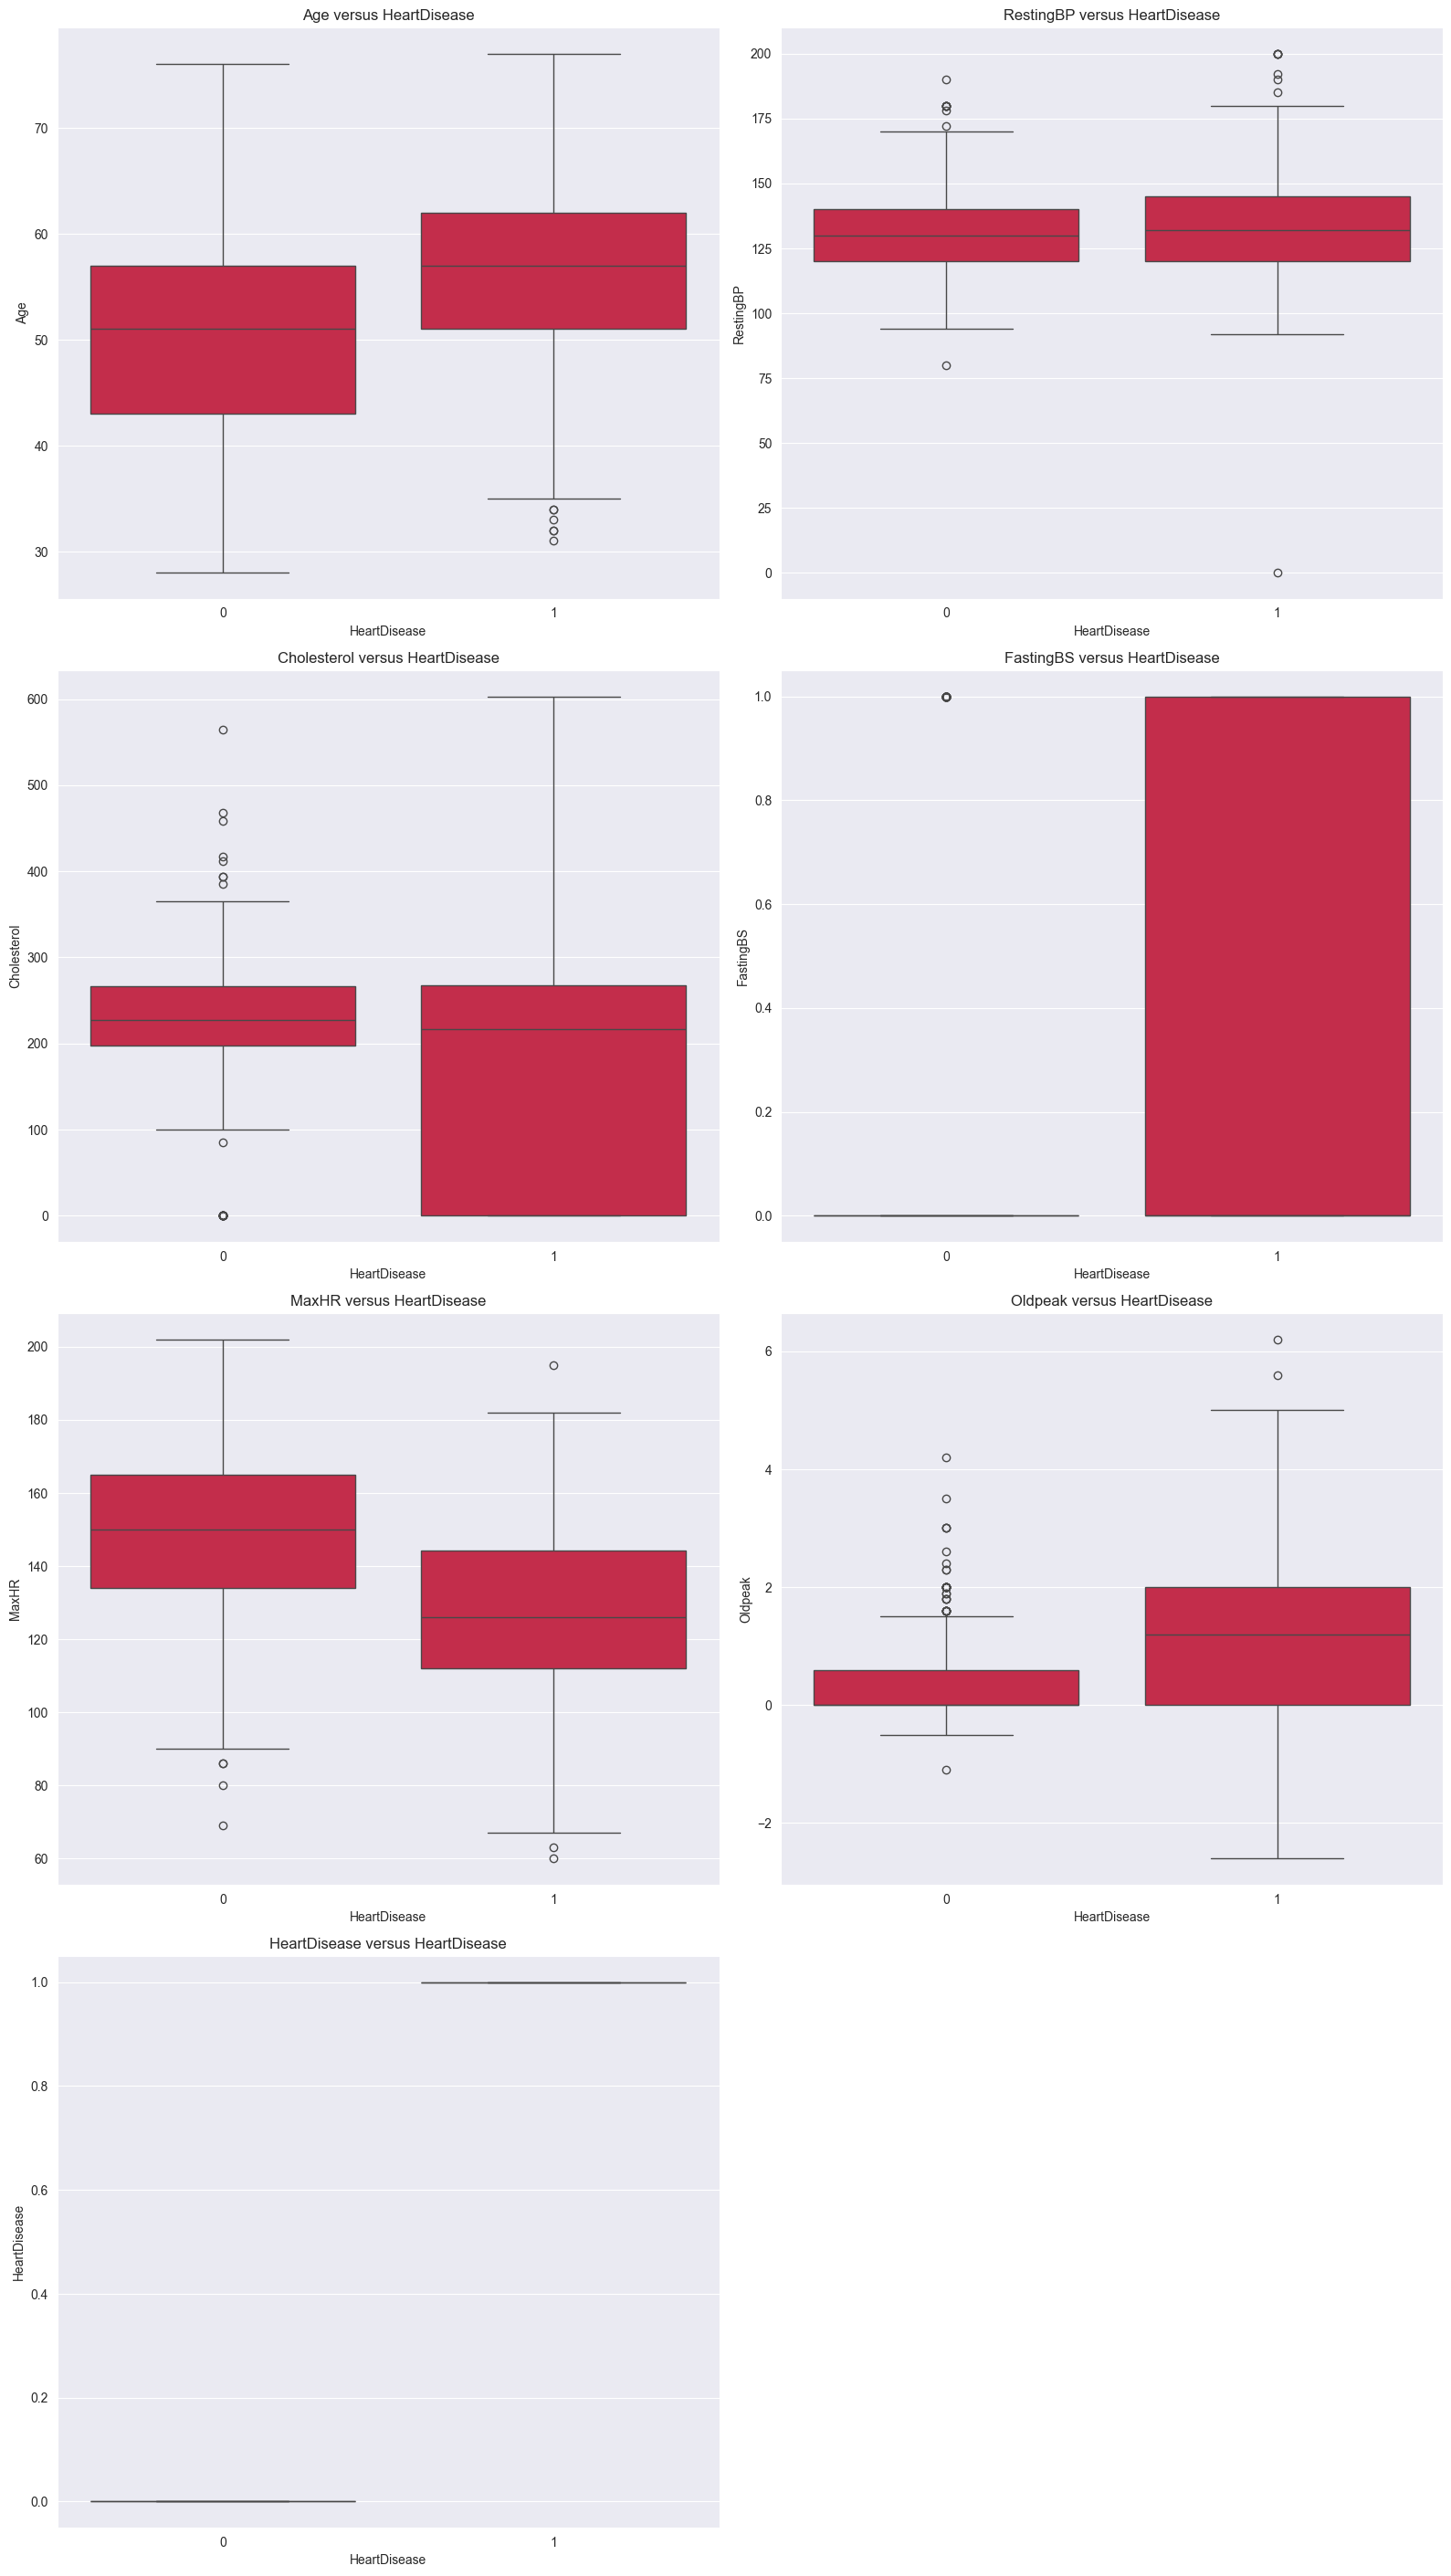

In [140]:
# Visualize a boxplot for numerical features against the target variable
plt.figure(figsize=(16, len(numerical_columns) * 7))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x='HeartDisease', y=feature, data=heart_data, color=COLOR)
    plt.title(f"{feature} versus HeartDisease")

plt.tight_layout()
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(16, len(numerical_columns) * 7))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x='HeartDisease', y=feature, data=heart_data, color=COLOR)
    plt.title(f"{feature} versus HeartDisease")
    
plt.tight_layout()
plt.savefig(f"{MEDIA_DIR_PATH}01-boxplot.png")
plt.close()

### Multivariate Analysis

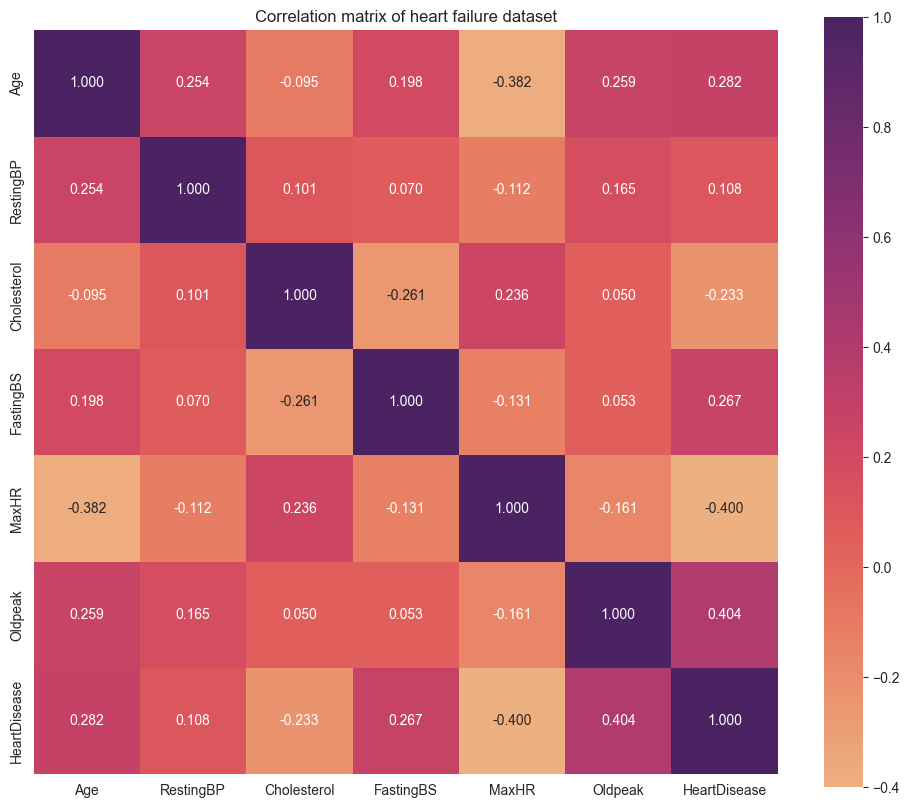

In [139]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap=PALETTE, square=True)
plt.title('Correlation matrix of heart failure dataset')
plt.show()

# Save this figure in MEDIA_DIR_PATH
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap=PALETTE, square=True)
plt.title('Correlation matrix of heart failure dataset')
plt.savefig(f"{MEDIA_DIR_PATH}01-correlation_matrix.png")
plt.close()